<a href="https://colab.research.google.com/github/30225/30225/blob/main/computer_vision_exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision Exam #1

Fernando Quintero    
Universidad Tecnológica de Bolívar    

This is the first exam of the computer vision course in Universidad Tecnológica de Bolívar. The exam consists of two exercises:

- Homogeneous Coordinates
- Linear and Non-linear Filters

Each exercise is weighted equally, with 2.5 points assigned to each, contributing to a total of 5 points for this part of the exam. Please ensure that you carefully read and address all questions.

Good luck!

In [ ]:
# Please fill in these lines with your student information
# Name: Angelo David Diaz Lopez
# Code: T00061141

## Exercise 1 (homogeneous coordinates)
Run the following cells to load the image of the train tracks and solve the exercise.



In [2]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
from matplotlib import pyplot as plt

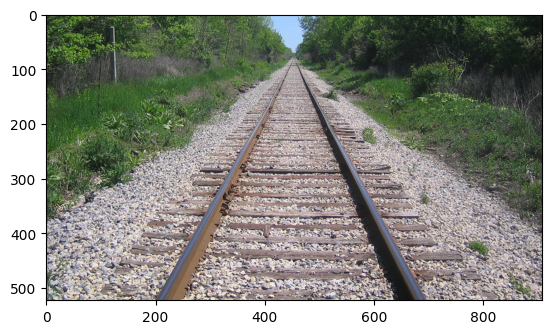

In [3]:
# URL of the image in the GitHub repository
url = "https://raw.githubusercontent.com/fquinterov/computer_vision_course/main/resources/images/train_tracks.png"

# Send a GET request to the URL
response = requests.get(url)

# Open the image from the response content
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.show()

- Plot the following points above the image:

\begin{align}
p_1 = \left(
\begin{array}{c}
390\\
200\\
\end{array}
\right)
, \enspace
p_2 = \left(
\begin{array}{c}
280\\
400\\
\end{array}
\right)
,\enspace
p_3 = \left(
\begin{array}{c}
520\\
200\\
\end{array}
\right)
,\enspace \text{and }
p_4 = \left(
\begin{array}{c}
620\\
400\\
\end{array}
\right)
,\enspace
\end{align}

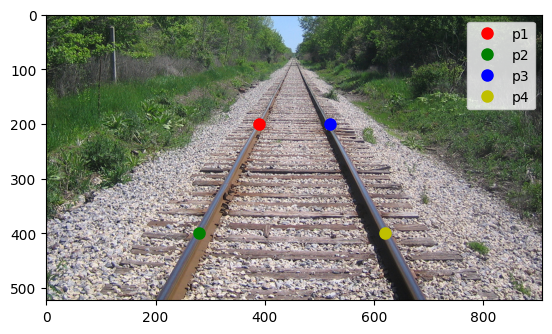

In [4]:
plt.imshow(img)
# PUT YOUR CODE HERE:
# (hint: use plt.plot):


# Definir los puntos
p1 = (390, 200)
p2 = (280, 400)
p3 = (520, 200)
p4 = (620, 400)

# Graficar los puntos
plt.plot(p1[0], p1[1], 'ro', markersize=8, label='p1')  # Rojo
plt.plot(p2[0], p2[1], 'go', markersize=8, label='p2')  # Verde
plt.plot(p3[0], p3[1], 'bo', markersize=8, label='p3')  # Azul
plt.plot(p4[0], p4[1], 'yo', markersize=8, label='p4')  # Amarillo

# Mostrar leyenda
plt.legend()


plt.show()




- Calculate the lines that pass through the above points.
- Plot the lines above the image. (Use the function linePoints to plot the lines)

Hint: Use np.cross(p1,p2) to calculate the line that passes through these points.

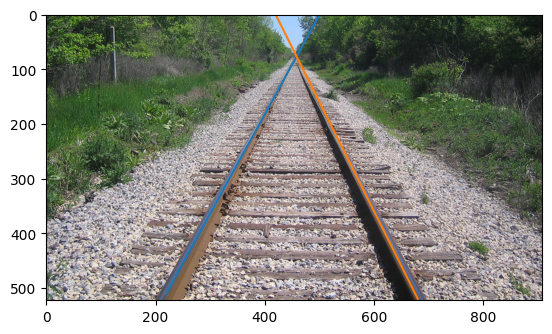

In [5]:
def linePoints(line = [0, 0, 0], ref = [-1.,1.]):
    """given a,b,c for straight line as ax+by+c=0,
    return and plot a pair of points based on ref values
    e.g linePoints(-1,1,2) == [[-1.0, -3.0], [1.0, -1.0]]
    """
    a = line[0]
    b = line[1]
    c = line[2]
    if (a==0 and b==0):
      raise Exception("linePoints: a and b cannot both be zero")
    else:
      points = np.array([[-c/a,p] if b==0 else [p,(-c-a*p)/b] for p in ref])
      plt.plot(points[:, 0], points[:, 1])
      return points

# PUT YOUR CODE HERE: Compute the lines.
# (hint: Use np.cross(p1,p2) to calculate the line that passes through these points. Remember that the points must be in homogeneous coordinates)

# Definir los puntos en coordenadas homogéneas
p1 = np.array([390, 200, 1])  # Primer punto
p2 = np.array([280, 400, 1])  # Segundo punto

# Calcular la ecuación de la línea que pasa por p1 y p2
l1 = np.cross(p1, p2)

p3 = np.array([520, 200, 1])  # Tercer punto
p4 = np.array([620, 400, 1])  # Cuarto punto

# Calcular la ecuación de la línea que pasa por p3 y p4
l2 = np.cross(p3, p4)

plt.imshow(img)
# PUT YOUR CODE HERE: Plot the lines.
# (hint: plot the lines with linePoints(lp1, [220, 500]), and linePoints(lp2, [420, 680]))
linePoints(l1, [220, 500])
linePoints(l2, [420, 680])
plt.show()

## Exercise 2 (filters)
Run the following cells to load the image of the UTB and solve the exercise.

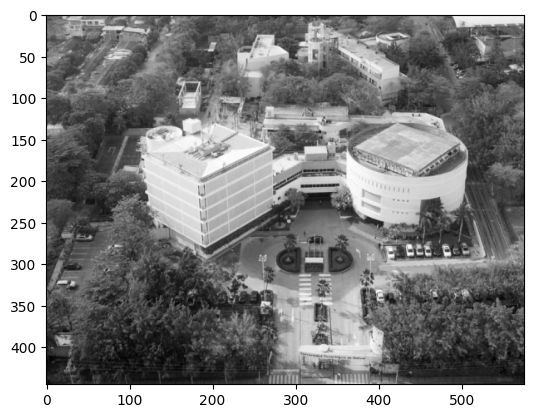

In [8]:
import pandas as pd
import cv2 as cv
from skimage import io, util
import skimage

# Create a list to store the urls of the images
url = "https://www.utb.edu.co/wp-content/uploads/2024/04/background-unidades-de-apoyo-de-rectoria-1.png"

image = io.imread(url)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.show()

- Add a salt and pepper noise to the image and trace the noise image.

Hint: Use the function `skimage.util.random_noise` with mode='s&p'

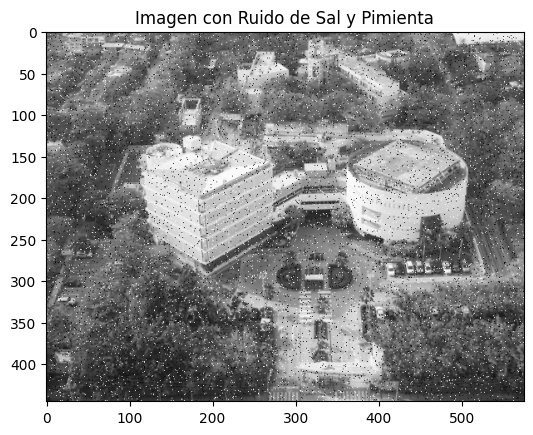

In [9]:
# PUT YOUR CODE HERE:

# Aplicar ruido de sal y pimienta
image_sp = util.random_noise(image, mode='s&p')
plt.title("Imagen con Ruido de Sal y Pimienta")

plt.imshow(image_sp, cmap = 'gray')

plt.show()

- Eliminate noise with one of the techniques seen in class (e.g. Gaussian or median filter).

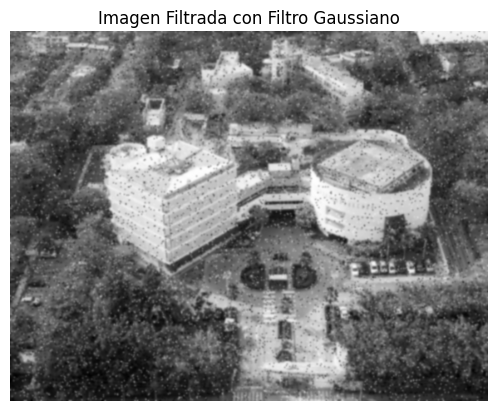

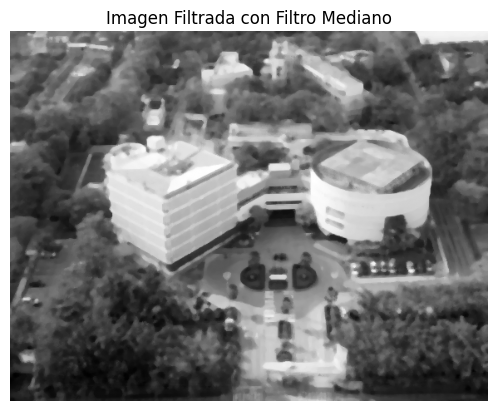

In [11]:
from scipy.ndimage import gaussian_filter
from skimage.filters import median
from skimage.morphology import disk

#PUT YOUR CODE HERE:


# Aplicar filtro Gaussiano
image_filtered_gaussian = gaussian_filter(image_sp, sigma=1)

# Aplicar filtro Mediano (mejor para eliminar ruido de sal y pimienta)
image_filtered_median = median(image_sp, disk(3))

# ==========================
# 3. Mostrar las imágenes filtradas
# ==========================

# Mostrar la imagen filtrada con el filtro Gaussiano
plt.imshow(image_filtered_gaussian, cmap='gray')
plt.axis('off')
plt.title("Imagen Filtrada con Filtro Gaussiano")
plt.show()

# Mostrar la imagen filtrada con el filtro Mediano
plt.imshow(image_filtered_median, cmap='gray')
plt.axis('off')
plt.title("Imagen Filtrada con Filtro Mediano")
plt.show()


In [ ]:
# Instalar LaTeX (requerido para la conversión a PDF)
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install pandoc

from google.colab import files

# Convertir el notebook actual a PDF con código y salidas
!jupyter nbconvert --to pdf "/.ipynb"

# Descargar el archivo PDF generado
files.download("/.pdf")